In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import folium
import gmaps

In [2]:
# Stacy's code starts here

## Naturalization data table cleaning

In [3]:
# Load naturalization table
nat_file = 'fy2018_naturalization.xlsx'
filepath = os.path.join('.', 'Resources', nat_file)

naturalization = pd.read_excel(filepath, header=5)

In [4]:
# Drop notes data at end of document
naturalization.drop(labels=range(112,118), inplace=True)
naturalization.tail()

,Year,filed,Total,Civilian,Military 2,Not reported,denied
107,2014,773824.0,653416.0,642431.0,7468.0,3517,66767.0
108,2015,783062.0,730259.0,720645.0,7234.0,2380,75810.0
109,2016,972151.0,753060.0,742090.0,8885.0,2085,86033.0
110,2017,986851.0,707265.0,695718.0,6883.0,4664,83176.0
111,2018,810548.0,761901.0,750771.0,4495.0,6635,92586.0


In [5]:
# Rename columns
naturalization.rename(columns={
    'filed': 'Petitions filed',
    'Total': 'Naturalized, total',
    'denied': 'Petitions denied'
}, inplace=True)

# Drop unneeded columns
naturalization = naturalization.drop(labels=['Civilian', 'Military 2', 'Not reported'], axis='columns')

In [6]:
# Find funny/footnoted years and fix them
for index, row in naturalization.iterrows():
    
    year = naturalization.loc[index, 'Year']
    
    if len(str(year)) > 4:
        year = int(year[0:5])
        naturalization.loc[index, 'Year'] = year
    else:
        pass

# Set year as index
naturalization.set_index(keys=['Year'], inplace=True)

In [7]:
# Change datatype to int for all columns
for c in naturalization.columns:
    naturalization[c] = naturalization[c].astype('int')

In [8]:
naturalization.head()

,Petitions filed,"Naturalized, total",Petitions denied
Year,,,
1907,21113,7941,250
1908,44032,25975,3330
1909,43141,38374,6341
1910,55750,39448,7781
1911,74740,56683,9017


In [11]:
# # Clean up weird column spacing issues
# for c in nat_country.columns:
#     nat_country.rename(columns={
#     c: str(c).strip()
# }, inplace=True)
    
# nat_country.columns

In [10]:
# Test if samples from certain years have normal distribution



## Asylum seeker demographic data 2018 cleaning

In [12]:
# Load asylum seeker age/gender/etc table (2018)
asy_2018_file = 'fy2018_table18d_asylum_age_etc.xlsx'
filepath = os.path.join('.', 'Resources', asy_2018_file)

asylum_2018 = pd.read_excel(filepath, header=4)

In [13]:
asylum_2018.tail(10)

,Characteristic,Total,Unnamed: 2,Spouses,Children
28,Total,25439.0,16927,3636,4876
29,Married,10142.0,6506,3636,-
30,Single,14154.0,9278,-,4876
31,Widowed,232.0,232,-,-
32,Divorced/separated,896.0,896,-,-
33,Unknown,15.0,15,-,-
34,D Data withheld to limit disclosure.,NaN,NaN,NaN,NaN
35,- Represents zero.,NaN,NaN,NaN,NaN
36,Note: Data not available for individuals grant...,NaN,NaN,NaN,NaN
37,Source: U.S. Department of Homeland Security.,NaN,NaN,NaN,NaN


In [14]:
# Drop notes data at end of document
asylum_2018.drop(labels=range(34,38), inplace=True)
asylum_2018.tail()

,Characteristic,Total,Unnamed: 2,Spouses,Children
29,Married,10142.0,6506,3636,-
30,Single,14154.0,9278,-,4876
31,Widowed,232.0,232,-,-
32,Divorced/separated,896.0,896,-,-
33,Unknown,15.0,15,-,-


In [17]:
# Split into sex [5:8], rename column
asylum_2018_sex = asylum_2018.iloc[1:4,0:2]
asylum_2018_sex.rename(columns={
    "Characteristic": "Sex"
}, inplace=True)

# reset index
asylum_2018_sex.set_index(keys='Sex', inplace=True)
asylum_2018_sex

# Rename "total" to reflect dataset scope
asylum_2018_sex.rename(columns={
    "Total": "Asylum 2018"
}, inplace=True)
asylum_2018_sex

,Asylum 2018
Sex,
Total,25439.0
Female,12483.0
Male,12956.0


In [20]:
# Split out broad age group [27:31]
asylum_2018_broad_age = asylum_2018.iloc[22:27,0:2]
asylum_2018_broad_age_total = asylum_2018_broad_age.drop([22])
asylum_2018_broad_age_total.rename(columns={
    "Characteristic": "Age"
}, inplace=True)
asylum_2018_broad_age_total.set_index(keys='Age', inplace=True)
asylum_2018_broad_age_total

# Rename "total" to reflect dataset scope
asylum_2018_broad_age_total.rename(columns={
    "Total": "Asylum 2018"
}, inplace=True)
asylum_2018_broad_age_total

,Asylum 2018
Age,
Total,25439.0
Under 16 years,4837.0
16 to 20 years,3278.0
21 years and over,17324.0


In [22]:
# Split out marital status [32:38]
asylum_2018_marital = asylum_2018.iloc[28:34,0:2]
asylum_2018_marital.rename(columns={
    "Characteristic": "Marital Status"
}, inplace=True)
asylum_2018_marital.set_index(keys='Marital Status', inplace=True)
asylum_2018_marital

# Rename "total" to reflect dataset scope
asylum_2018_marital.rename(columns={
    "Total": "Asylum 2018"
}, inplace=True)
asylum_2018_marital

,Asylum 2018
Marital Status,
Total,25439.0
Married,10142.0
Single,14154.0
Widowed,232.0
Divorced/separated,896.0
Unknown,15.0


## Asylum seeker demographic data 2009 cleaning

In [23]:
# Cleaning asylum demographic data from 2009
asy_2009_file = 'fy_2009_table15d_asylum_age_etc.xls'
filepath = os.path.join('.', 'Resources', asy_2009_file)

asylum_2009 = pd.read_excel(filepath, header=5)

In [24]:
asylum_2009.head(10)

,Characteristic,Total,Unnamed: 2,Spouses,Children
0,GENDER,NaN,NaN,NaN,NaN
1,Total,74602.0,32511,13440,28651
2,Male,38491.0,21839,1844,14808
3,Female,36111.0,10672,11596,13843
4,NaN,NaN,NaN,NaN,NaN
5,AGE,NaN,NaN,NaN,NaN
6,Total,74602.0,32511,13440,28651
7,Under 1 year,361.0,4,-,357
8,1 to 4 years,6409.0,78,-,6331
9,5 to 9 years,7226.0,143,-,7083


In [25]:
# Drop notes data at end of document
asylum_2009.drop(labels=range(37,41), inplace=True)
asylum_2009.tail()

,Characteristic,Total,Unnamed: 2,Spouses,Children
32,Single,40798.0,12182,25,28591
33,Married,29770.0,16340,13404,26
34,Widowed,2452.0,D,-,D
35,Divorced/separated,1483.0,1464,5,NaN
36,Unknown,99.0,D,6,D


In [26]:
# Split into sex [5:8], rename column
asylum_2009_sex = asylum_2009.iloc[1:4,0:2]
asylum_2009_sex.rename(columns={
    "Characteristic": "Sex"
}, inplace=True)
asylum_2009_sex

# Rename "total" to reflect dataset scope
asylum_2009_sex.rename(columns={
    "Total": "Asylum 2009"
}, inplace=True)

# reset index
asylum_2009_sex.set_index(keys='Sex', inplace=True)
asylum_2009_sex

,Asylum 2009
Sex,
Total,74602.0
Male,38491.0
Female,36111.0


In [27]:
# Split out broad age group [32:35]
asylum_2009_broad_age = asylum_2009.iloc[25:29,0:2]
asylum_2009_broad_age.rename(columns={
    "Characteristic": "Age"
}, inplace=True)

asylum_2009_broad_age['Age'] = asylum_2009_broad_age['Age'].str.strip()
asylum_2009_broad_age['Age']

asylum_2009_broad_age.set_index(keys='Age', inplace=True)

asylum_2009_broad_age.index

# Rename "total" to reflect dataset scope
asylum_2009_broad_age.rename(columns={
    "Total": "Asylum 2009"
}, inplace=True)

asylum_2009_broad_age

,Asylum 2009
Age,
Total,74602.0
Under 16,22288.0
Age 16 to 20,7889.0
Age 21 and over,44425.0


In [28]:
# Split out 2009 marital status
asylum_2009_marital = asylum_2009.iloc[31:37,0:2]
asylum_2009_marital.rename(columns={
    "Characteristic": "Marital Status"
}, inplace=True)
asylum_2009_marital.set_index(keys='Marital Status', inplace=True)

# Rename "total" to reflect dataset scope
asylum_2009_marital.rename(columns={
    "Total": "Asylum 2009"
}, inplace=True)

asylum_2009_marital

,Asylum 2009
Marital Status,
Total,74602.0
Single,40798.0
Married,29770.0
Widowed,2452.0
Divorced/separated,1483.0
Unknown,99.0


In [29]:
# # Clean up inconsistencies between df indices
# asylum_2009_broad_age.rename({'Under 16': '< 16', 
#                                           'Age 16 to 20': '16 - 20', 
#                                           'Age 21 and over': '21+'}, axis='index', inplace=True)

# asylum_2018_broad_age_total.rename({'Under 16 years': '< 16', 
#                                           '16 to 20 years': '16 - 20', 
#                                           '21 years and over': '21+'}, axis='index', inplace=True)

In [30]:
# # Merge LPR and Asyulym seeker datasets

# # Join asylum datasets together
# lpr_asylum_sex = asylum_2009_sex.merge(asylum_2018_sex, how="inner", left_index=True, right_index=True)
# lpr_asylum_age = asylum_2009_broad_age.merge(asylum_2018_broad_age_total, how="inner", left_index=True, right_index=True)
# lpr_asylum_marital = asylum_2009_marital.merge(asylum_2018_marital, how="inner", left_index=True, right_index=True)

In [33]:
lpr_asylum_sex

,Asylum 2009,Asylum 2018
Sex,,
Total,74602.0,25439.0
Male,38491.0,12956.0
Female,36111.0,12483.0


In [ ]:
# Stacy's code ends here

In [ ]:
# Kana's code starts here

# State data table cleaning

In [ ]:
# Read bystate csv data
bystate = pd.read_csv("Resources/By state data.csv")

# Dropna
bystate = bystate.dropna()

# Drop others
bystate.drop(bystate.tail(1).index,inplace=True)

# Change data to integer
bystate.iloc[:,1:20].astype(int)

# Show the dataframe
bystate.head()

In [ ]:
# List of US state abbreviation
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

# Reverse key and value
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [ ]:
# Create an empty dictionary list
dict_list=[]

# For each key and value in dictionary, combine them and add them to a list
for key,value in abbrev_us_state.items():
    dict_list.append((key,value))
    
# Print the list
#print (dict_list)

In [ ]:
# Create a dataframe using dictionary list
state_abbrev = pd.DataFrame(dict_list)
state_abbrev.columns = ["Abbrev","State"]

# Show the dataframe
state_abbrev.head()

In [ ]:
# Merge bystate data and state abbreveation dataframe
complete_state_df = pd.merge(bystate, state_abbrev, on = "State")

# Rename columns
complete_state_df = complete_state_df.rename(columns = {"State" : "State Name",
                                                        "Abbrev" : "State"})

# Show the dataframe
complete_state_df

In [ ]:
# Get 2000 immigration data
bystate_2000 = complete_state_df.loc[:,["State","2000"]]

# Change data type
convert_dict = {'State': str, 
                '2000': int} 

# 
bystate_2000 = bystate_2000.astype(convert_dict) 
bystate_2000.head()

In [ ]:
# Get 2018 immigration data
bystate_2018 = complete_state_df.loc[:,["State","2018"]]
convert_dict = {'State': str, 
                '2018': int} 

# Change data type
bystate_2018 = bystate_2018.astype(convert_dict) 

# Show the 
bystate_2018.head()

In [ ]:
# Initialize the map:
map_2000 = folium.Map(location=[37, -102], zoom_start=4)
state_geo = os.path.join('us-states.json')

# Add the color for the chloropleth:
map_2000.choropleth(geo_data=state_geo,
                    name='choropleth',
                    data=bystate_2000,
                    columns=['State', '2000'],
                    key_on='feature.id',
                    fill_color='YlGn',
                    fill_opacity=0.7,
                    line_opacity=0.2,
                    legend_name='Number of Immigrants in 2000')

folium.LayerControl().add_to(map_2000)

# Show the map
map_2000

In [ ]:
# Initialize the map
state_geo = os.path.join('us-states.json')
map_2018 = folium.Map(location=[37, -102], zoom_start=4)
 
# Add the color for the chloropleth:
map_2018.choropleth(geo_data=state_geo,
                    name='choropleth',
                    data=bystate_2018,
                    columns=['State', '2018'],
                    key_on='feature.id',
                    fill_color='YlGn',
                    fill_opacity=0.7,
                    line_opacity=0.2,
                    legend_name='Number of Immigrants in 2018')
folium.LayerControl().add_to(map_2018)

# Show the map
map_2018

# Immigrants vs US Population Data Cleanup

In [135]:
# Reading Data for Permanent_Resident_Years 
us_immigrants = pd.read_excel("Resources/MPI-Data-Hub_Immigrants_N-Percent-US-Population_2017_0.xlsx", index = False)

#Data Cleaning
us_immigrants = us_immigrants.drop([0,1,2,3,4,5,31,32,33])

# Make the first row as header
us_immigrants = us_immigrants.rename(columns=us_immigrants.iloc[0]).drop(us_immigrants.index[0])
us_immigrants.Year= pd.to_numeric(us_immigrants.Year)
us_immigrants["Number of Immigrants"] = pd.to_numeric(us_immigrants["Number of Immigrants"])
us_immigrants["Immigrants as a Percentage of the U.S. Population (%)"] = pd.to_numeric(us_immigrants["Immigrants as a Percentage of the U.S. Population (%)"])
us_immigrants.to_csv("Output_files/Immigrants Population.csv", index=False) 
us_immigrants

,Year,Number of Immigrants,Immigrants as a Percentage of the U.S. Population (%)
7,1850,2244600,9.7
8,1860,4138700,13.2
9,1870,5567200,14.4
10,1880,6679900,13.3
11,1890,9249500,14.8
12,1900,10341300,13.6
13,1910,13515900,14.7
14,1920,13920700,13.2
15,1930,14204100,11.6
16,1940,11594900,8.8


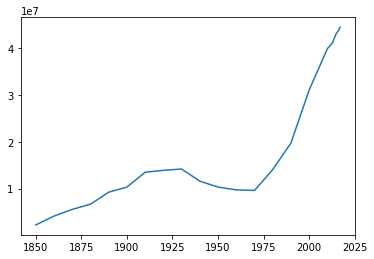

In [138]:
immigrants_number = us_immigrants[["Year","Number of Immigrants"]]
plt.plot(immigrants_number["Year"], immigrants_number["Number of Immigrants"])

In [137]:
immigrants_number

,Year,Number of Immigrants
7,1850,2244600
8,1860,4138700
9,1870,5567200
10,1880,6679900
11,1890,9249500
12,1900,10341300
13,1910,13515900
14,1920,13920700
15,1930,14204100
16,1940,11594900


In [105]:
print(us_immigrants["Number of Immigrants"])

0      2244600
1      4138700
2      5567200
3      6679900
4      9249500
5     10341300
6     13515900
7     13920700
8     14204100
9     11594900
10    10347400
11     9738100
12     9619300
13    14079900
14    19767300
15    31107900
16    39955900
17    40377900
18    40824700
19    41348100
20    42391800
21    43290400
22    43739300
23    44525900
Name: Number of Immigrants, dtype: int64


In [53]:
# Reading Data for US population
world_population = pd.read_csv("Resources/WPP2019_TotalPopulationBySex.csv")

# Get US data
us_population = world_population.loc[world_population["Location"] == "United States of America"]

# Retrive needed columns
us_population = us_population[["Location","Time","PopTotal"]]

# Get data before 2018
us_population = us_population.loc[us_population["Time"] <= 2018]
us_population.tail()

,Location,Time,PopTotal
264285,United States of America,2014,318673.422
264286,United States of America,2015,320878.312
264287,United States of America,2016,323015.992
264288,United States of America,2017,325084.758
264289,United States of America,2018,327096.263


In [55]:
population_list = []

# for index, row in us_population.iterrows():
#     us_population.loc[index, "Population"] = us_population["PopTotal"] * 1000 

for year in us_population["PopTotal"]:
    population = year * 1000
    population_list.append(population)
    
us_population["Population"] = population_list
us_population

,Location,Time,PopTotal,Population
264221,United States of America,1950,158804.397,158804397.0
264222,United States of America,1951,160872.264,160872264.0
264223,United States of America,1952,163266.026,163266026.0
264224,United States of America,1953,165909.996,165909996.0
264225,United States of America,1954,168736.390,168736390.0
...,...,...,...,...
264285,United States of America,2014,318673.422,318673422.0
264286,United States of America,2015,320878.312,320878312.0
264287,United States of America,2016,323015.992,323015992.0
264288,United States of America,2017,325084.758,325084758.0


In [57]:
print(1096611 / 327096263)

0.0033525635234787137


In [ ]:
# Kana's code ends here

In [ ]:
# Satish start

In [6]:
#Reading Data for Permanent_Resident_Years 
immigration_df=pd.read_csv("Resources/Permanent_Resident_Years.csv")
immigration_df['Number'] = [x.replace(',', '') for x in immigration_df['Number']]

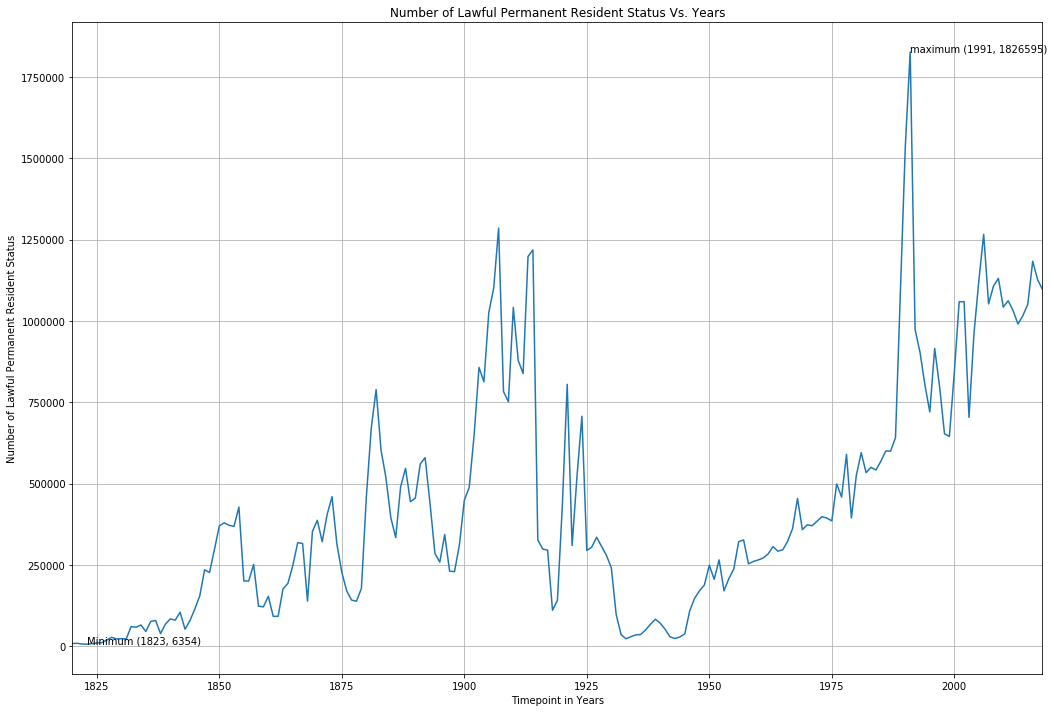

In [7]:
#Data Cleaning
immigration_df.Year=pd.to_numeric(immigration_df.Year)
immigration_df.Number=pd.to_numeric(immigration_df.Number)
#Plotting the Graph
immigration_plt=immigration_df.plot(kind="line", x="Year", y="Number", grid=True, figsize=(15,10),legend=False,title="Number of Lawful Permanent Resident Status Vs. Years")
#Finding Max value
max_arrow_y=immigration_df['Number'].max()
max_arrow_x=immigration_df.loc[immigration_df['Number']==max_arrow_y,"Year"].reset_index(drop=True)
#Printing Max value in graph
plt.annotate(
    f"maximum {max_arrow_x[0],max_arrow_y}", 
    xy=(max_arrow_x[0], max_arrow_y))
#Finding Minimum value
min_arrow_y=immigration_df['Number'].min()
min_arrow_x=immigration_df.loc[immigration_df['Number']==min_arrow_y,"Year"].reset_index(drop=True)
#Printing Min Value in graph
plt.annotate(
    f"Minimum {min_arrow_x[0],min_arrow_y}", 
    xy=(min_arrow_x[0], min_arrow_y))
#Labeling the Graph
plt.ylabel("Number of Lawful Permanent Resident Status")
plt.xlabel("Timepoint in Years")
plt.tight_layout()
plt.show()

In [ ]:
#Reading CSV
Country_Data_2018=pd.read_csv("Resources/Country_Data_2018.csv")
Country_Data_1999=pd.read_csv("Resources/Country_Data_1999.csv")
Country_Data_2009=pd.read_csv("Resources/Country_Data_2009.csv")

In [ ]:
#Data cleaning,Removing extra column
Country_Data_1999=Country_Data_1999.iloc[:, :-1]

In [ ]:
#Removing Data which has No value
Country_Data_2018_df=Country_Data_2018.dropna()
Country_Data_1999_df=Country_Data_1999.dropna()
Country_Data_2009_df=Country_Data_2009.dropna()

In [ ]:
#Extract First Column so that it can be used for Name as Header
new_header_2018 = Country_Data_2018_df.iloc[0]
new_header_1999 = Country_Data_1999_df.iloc[0]
new_header_2009 = Country_Data_2009_df.iloc[0]

In [ ]:
#Renaming the Header removing first row
Country_Data_2018_df.columns=new_header_2018
Country_Data_2018_df=Country_Data_2018_df[1:]

Country_Data_1999_df.columns=new_header_1999
Country_Data_1999_df=Country_Data_1999_df[1:]


Country_Data_2009_df.columns=new_header_2009
Country_Data_2009_df=Country_Data_2009_df[1:]

In [ ]:
#List of Countries in central America
Central_America_Data=['Mexico', 'Guatemala', 'Honduras', 'Nicaragua', 'El Salvador', 'Costa Rica', 'Panama', 'Belize']
#Getting only records of Central America from main Data Set
Latin_Data_df=Country_Data_2018_df[Country_Data_2018_df['Region and country of birth'].isin(Central_America_Data)]
#Data Cleaning
Latin_Data_df=Latin_Data_df.apply(lambda x: x.str.replace(',',''))

In [ ]:
#Creating new DataFrame for required Data
Latin_Data_summ=[['2014',pd.to_numeric(Latin_Data_df['2014']).sum()],['2015',pd.to_numeric(Latin_Data_df['2015']).sum()],['2017',pd.to_numeric(Latin_Data_df['2017']).sum()],['2018',pd.to_numeric(Latin_Data_df['2018']).sum()]]
Latin_Data_summ_df=pd.DataFrame(Latin_Data_summ, columns = ['Year', 'Count'])

In [ ]:
#Bar Graph showing the Central America and Years
Latin_Data_summ_df.plot.bar(x='Year', y='Count', rot=0,legend=False)
plt.axis('tight')
plt.title("Number of Immigrants Vs Year")
plt.ylabel("Total Number of Immigrants from Central America")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

In [ ]:
#List of Islamic Countries 
Islam_Country_Data=['Afghanistan','Iran','Yemen','Jordan','Saudi Arabia','Sudan','Pakistan','Syria','Oman']
#Data Set till 1999 
Islam_Data_1999_df=Country_Data_1999_df[Country_Data_1999_df['Region and country of birth'].isin(Islam_Country_Data)]
#Data Cleaning
Islam_Data_1999_df=Islam_Data_1999_df.apply(lambda x: x.str.replace(',',''))

In [ ]:
#Data Set form 2000 to 2009 
Islam_Data_2009_df=Country_Data_2009_df[Country_Data_2009_df['Region and country of birth'].isin(Islam_Country_Data)]
#Data Cleaning
Islam_Data_2009_df=Islam_Data_2009_df.apply(lambda x: x.str.replace(',',''))

In [ ]:
#Merging the DataFrame
Merge_Islam_Country=pd.merge(Islam_Data_1999_df,Islam_Data_2009_df,how='outer')
#New DataFrame with reuqired Dataset
Islam_Country_summ=[['1999',pd.to_numeric(Merge_Islam_Country['1999']).sum()],['2000',pd.to_numeric(Merge_Islam_Country['2000']).sum()],['2005',pd.to_numeric(Merge_Islam_Country['2005']).sum()],['20006',pd.to_numeric(Merge_Islam_Country['2006']).sum()]]
Islam_Country_summ=pd.DataFrame(Islam_Country_summ, columns = ['Year', 'Count'])

In [ ]:
#Ployyinh the Graph
Islam_Country_summ.plot.bar(x='Year', y='Count', rot=0,legend=False)
plt.axis('tight')
plt.title("Number of Immigrants Vs Year")
plt.ylabel("Total Number of Immigrants from Arab Countries")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

In [ ]:
# Satish end

In [34]:
# Umar's code starts here
#Read in the Excel file and view the headers
Lawful_df = pd.read_excel("./Resources/fy2018_Lawful.xlsx", header=4)
Lawful_df.head()

,Characteristic,Total,Female,Male,Unknown
0,AGE,NaN,NaN,NaN,NaN
1,Total,1096611.0,584426.0,512176.0,9
2,Under 1 year,2959.0,1472.0,1487.0,-
3,1 to 4 years,34215.0,16976.0,17239.0,-
4,5 to 9 years,61533.0,30098.0,31433.0,2


In [35]:
#Use the iloc function to locate the point of interest in a data set
Broad_age = Lawful_df.iloc[19:23,:]
Broad_age

,Characteristic,Total,Female,Male,Unknown
19,Total,1096611.0,584426.0,512176.0,9
20,Under 16 years,177300.0,86839.0,90458.0,3
21,16 to 20 years,85830.0,42113.0,43715.0,2
22,21 years and over,833481.0,455474.0,378003.0,4


In [67]:
#View the characteristic and Total columns 
Broad_age_df = pd.DataFrame(Broad_age)
Sex = Broad_age_df.iloc[:, 0:2]
Sex

,Characteristic,Total
19,Total,1096611.0
20,Under 16 years,177300.0
21,16 to 20 years,85830.0
22,21 years and over,833481.0


In [37]:
#Rename your columns 
Cleaned = Sex.rename(columns={"Characteristic": "Age", "Total": "Lawful 2018"})
Index_age = Cleaned.set_index("Age")
Index_age

,Lawful 2018
Age,
Total,1096611.0
Under 16 years,177300.0
16 to 20 years,85830.0
21 years and over,833481.0


In [68]:
#View a single row 
Sex = Lawful_df.iloc[19,1:]
Sex.to_frame(name="LPR 2018")

,LPR 2018
Total,1.09661e+06
Female,584426
Male,512176
Unknown,9


In [39]:
#Use the iloc function to locate the point of interest in a data set
Marital_status = Lawful_df.iloc[24:30,:]
Marital_status

,Characteristic,Total,Female,Male,Unknown
24,Total,1096611.0,584426.0,512176.0,9
25,Married,627443.0,342625.0,284816.0,2
26,Single,400196.0,191733.0,208457.0,6
27,Widowed,26579.0,23446.0,3133.0,-
28,Divorced/separated,32416.0,22045.0,10371.0,-
29,Unknown,9977.0,4577.0,5399.0,1


In [40]:
#View the characteristic and Total columns 
New_marital_df = pd.DataFrame(Marital_status)
Specific = New_marital_df.iloc[:, 0:2]
Specific

,Characteristic,Total
24,Total,1096611.0
25,Married,627443.0
26,Single,400196.0
27,Widowed,26579.0
28,Divorced/separated,32416.0
29,Unknown,9977.0


In [10]:
#Rename your columns 
Renamed = Specific.rename(columns={"Characteristic": "Marital Status", "Total": "Lawful Permanent Resident 2018"})
Renamed.head()

,Marital Status,Lawful Permanent Resident 2018
24,Total,1096611.0
25,Married,627443.0
26,Single,400196.0
27,Widowed,26579.0
28,Divorced/separated,32416.0


In [41]:
#View a single column 
Status = Lawful_df.iloc[24:30,0:2]
Name18 = Status.rename(columns={"Characteristic": "Marital Status", "Total": "Lawful 2018"})
#Set marital status as index for clarity
Name18.set_index("Marital Status", inplace=True)
Name18

,Lawful 2018
Marital Status,
Total,1096611.0
Married,627443.0
Single,400196.0
Widowed,26579.0
Divorced/separated,32416.0
Unknown,9977.0


In [42]:
#Read in the Excel file and 
Lawful09_df = pd.read_excel("./Resources/fy2009_Lawful.xls", header=4)
Lawful09_df.head()

,Characteristic,Total,Male,Female,Unknown
0,AGE,NaN,NaN,NaN,NaN
1,Total,1130818.0,513015.0,617799,4
2,Under 1 year,5782.0,2706.0,3076,-
3,1 to 4 years,32395.0,15975.0,16420,-
4,5 to 9 years,55373.0,28263.0,27110,-


In [43]:
#Use the iloc function to locate the point of interest in a data set
Broad09_age = Lawful09_df.iloc[20:24,:]
Broad09_age

,Characteristic,Total,Male,Female,Unknown
20,Total,1130818.0,513015.0,617799,4
21,Under 16 years,185960.0,94529.0,91431,-
22,16 to 20 years,101864.0,50720.0,51144,-
23,21 years and over,842992.0,367764.0,475224,4


In [44]:
#View the characteristic and Total columns 
Broad09_age_df = pd.DataFrame(Broad09_age)
Sex09 = Broad09_age_df.iloc[:, 0:2]
Sex09

,Characteristic,Total
20,Total,1130818.0
21,Under 16 years,185960.0
22,16 to 20 years,101864.0
23,21 years and over,842992.0


In [45]:
#Rename your columns 
Age09 = Sex09.rename(columns={"Characteristic": "Age", "Total": "Lawful Permanent Resident 2009"})
New_index09 = Age09.set_index("Age")
New_index09

,Lawful Permanent Resident 2009
Age,
Total,1130818.0
Under 16 years,185960.0
16 to 20 years,101864.0
21 years and over,842992.0


In [49]:
#View a single row 
Sex09 = Lawful09_df.iloc[20,1:]
Sex09 = Sex09.to_frame(name="LPR 2009")

In [50]:
Sex09

,LPR 2009
Total,1.13082e+06
Male,513015
Female,617799
Unknown,4


In [52]:
#Use the iloc function to locate the point of interest in a data set
Marital09_status = Lawful09_df.iloc[26:32,:]
Marital09_status

,Characteristic,Total,Male,Female,Unknown
26,Total,1130818.0,513015.0,617799,4
27,Single,417232.0,219812.0,197419,1
28,Married,654674.0,279354.0,375320,-
29,Widowed,28439.0,3288.0,25151,-
30,Divorced/separated,26015.0,8261.0,17754,-
31,Unknown,4458.0,2300.0,2155,3


In [53]:
#View the characteristic and Total columns 
New09_marital_df = pd.DataFrame(Marital09_status)
Specific09 = New09_marital_df.iloc[:, 0:2]
Specific09

,Characteristic,Total
26,Total,1130818.0
27,Single,417232.0
28,Married,654674.0
29,Widowed,28439.0
30,Divorced/separated,26015.0
31,Unknown,4458.0


In [54]:
#Rename your columns 
Renamed09 = Specific09.rename(columns={"Characteristic": "Marital Status", "Total": "Lawful Permanent Resident 2009"})
Renamed09.head()

,Marital Status,Lawful Permanent Resident 2009
26,Total,1130818.0
27,Single,417232.0
28,Married,654674.0
29,Widowed,28439.0
30,Divorced/separated,26015.0


In [55]:
#View a single column
Status09 = Lawful09_df.iloc[26:32,0:2]
Name09 = Status09.rename(columns={"Characteristic": "Marital Status", "Total": "Lawful 2009"})
#Set marital status as index for clarity
Name09.set_index("Marital Status", inplace=True)
Name09

#Umar Code ends here

,Lawful 2009
Marital Status,
Total,1130818.0
Single,417232.0
Married,654674.0
Widowed,28439.0
Divorced/separated,26015.0
Unknown,4458.0


### Merge LPR and asylum seeker datasets

In [ ]:
# Stacy code for merging datasets starts here

In [117]:
# Clean up inconsistencies between df indices and types
asylum_2009_broad_age.rename({'Under 16': '< 16', 
                                          'Age 16 to 20': '16 - 20', 
                                          'Age 21 and over': '21+'}, axis='index', inplace=True)

asylum_2018_broad_age_total.rename({'Under 16 years': '< 16', 
                                          '16 to 20 years': '16 - 20', 
                                          '21 years and over': '21+'}, axis='index', inplace=True)

sex_18 = Sex.to_frame(name="Lawful 2018")

In [122]:
# Merge LPR and Asyulym seeker datasets

# Join asylum datasets together
lpr_asylum_sex = asylum_2009_sex.merge(asylum_2018_sex, how="inner", left_index=True, right_index=True)
lpr_asylum_age = asylum_2009_broad_age.merge(asylum_2018_broad_age_total, how="inner", left_index=True, right_index=True)
lpr_asylum_marital = asylum_2009_marital.merge(asylum_2018_marital, how="inner", left_index=True, right_index=True)

# Join LPR datasets together 
lpr_age = New_index09.merge(Index_age, how="inner", left_index=True, right_index=True)
lpr_sex = Sex09.merge(sex_18, how="inner", left_index=True, right_index=True)
lpr_marital = Name09.merge(Name18, how="inner", left_index=True, right_index=True)

In [123]:
# Clean up inconsistencies on index and column names

for c in lpr_age.index:
    lpr_age.rename(index={
    c: str(c).strip()
}, inplace=True)
    
lpr_age.rename({'Under 16 years': '< 16', 
               '16 to 20 years': '16 - 20', 
               '21 years and over': '21+'}, axis='index', inplace=True)

lpr_age.rename({'Lawful Permanent Resident 2009': 'Lawful 2009'})

lpr_sex.rename(columns={'LPR 2009': 'Lawful 2009'}, inplace=True)

In [124]:
lpr_asylum_sex = lpr_asylum_sex.merge(lpr_sex, how="inner", left_index=True, right_index=True)
lpr_asylum_age = lpr_asylum_age.merge(lpr_age, how="inner", left_index=True, right_index=True)
lpr_asylum_marital = lpr_asylum_marital.merge(lpr_marital, how="inner", left_index=True, right_index=True)

In [125]:
lpr_asylum_sex

,Asylum 2009,Asylum 2018,Lawful 2009,Lawful 2018
Total,74602.0,25439.0,1.13082e+06,1.09661e+06
Male,38491.0,12956.0,513015,512176
Female,36111.0,12483.0,617799,584426


In [127]:
# Export cleaned data to Outputs folder

filename = 'la_sex.csv'
path = os.path.join('.', 'Output_files', filename)
lpr_asylum_sex.to_csv(path)

filename = 'la_age.csv'
path = os.path.join('.', 'Output_files', filename)
lpr_asylum_age.to_csv(path)

filename = 'la_marital.csv'
path = os.path.join('.', 'Output_files', filename)
lpr_asylum_marital.to_csv(path)

In [ ]:
# Stacy code for merging datasets ends here